In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

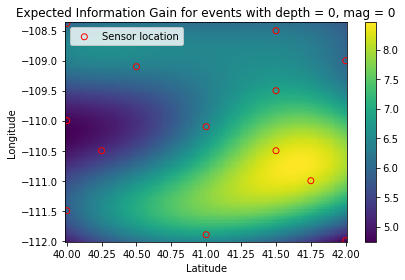

In [3]:
# def plot_surface(output_file='outputs.npz', depth_slice=0, mag_slice=1, stepsize=100):
stepsize=100
depth_slice=0
mag_slice=0
data = dict(np.load('outputs.npz'))

target = data['ig']

inputs = data['theta_data']
lat_range = data['lat_range']
long_range = data['long_range']

target = target.reshape(len(inputs),-1).mean(axis=1)

x = np.linspace(lat_range[0], lat_range[1], stepsize)
y = np.linspace(long_range[0], long_range[1], stepsize)

xv, yv = np.meshgrid(x, y)
xy = np.vstack([xv.ravel(), yv.ravel()]).T

domain = np.zeros((stepsize**2, 4))
domain[:,:2] = xy
domain[:,2] = depth_slice
domain[:,3] = 2

model = GPR()
model.fit(inputs,target)
preds = model.predict(domain)

plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
               shading='auto', cmap='viridis')
plt.colorbar()

plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
            marker='o',facecolors='none', edgecolors='red', 
            label='Sensor location')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Expected Information Gain for events with depth = {depth_slice}, mag = {mag_slice}')
plt.legend()
plt.tight_layout()
plt.show()

In [179]:
inputs[:,3].max()

3.5102999566398116

In [182]:
df = pd.DataFrame(inputs, columns=['lat','long','depth','mag'])

In [184]:
df[df['mag']>=2]

,lat,long,depth,mag
27,40.562500,-110.981875,6.250000,2.005150
47,40.156250,-111.151562,10.625000,2.306180
72,41.421875,-109.426406,25.312500,2.607210
100,41.828125,-109.256719,32.187500,2.130089
149,41.460938,-111.816172,17.656250,2.063142
185,41.804688,-110.288984,4.531250,2.431119
194,40.539062,-108.563828,39.218750,2.908240
238,40.195312,-110.091016,23.593750,2.209270
263,40.386719,-111.328320,38.671875,2.033179
291,40.855469,-110.706133,24.296875,2.364172


In [138]:
output_file = 'outputs.npz'
depth_slice = 0
mag_slice = 1
stepsize = 100

In [67]:
data = dict(np.load(output_file))

In [75]:
ig = data['ig']

theta_data = data['theta_data']
lat_range = data['lat_range']
long_range = data['long_range']

ig = ig.reshape(len(theta_data),-1).mean(axis=1)

In [78]:
df = pd.DataFrame(theta_data, columns=['lat','long','depth','mag'])
df['target'] = ig
restricted = df[df['depth']<=3]
inputs = restricted[['lat','long','depth','mag']]
targets = restricted['target']

In [101]:
x = np.linspace(lat_range[0], lat_range[1], stepsize)
y = np.linspace(long_range[0], long_range[1], stepsize)

xv, yv = np.meshgrid(x, y)
xy = np.vstack([xv.ravel(), yv.ravel()]).T

domain = np.zeros((stepsize**2, 4))
domain[:,:2] = xy
domain[:,2] = depth_slice
domain[:,3] = mag_slice

In [ ]:
kernel = RBF() + WhiteKernel()
model = GPR(kernel=kernel)
model.fit(inputs,targets)

preds = model.predict(domain)

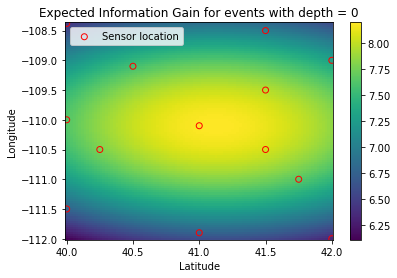

In [169]:
plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
               shading='auto', cmap='viridis')
plt.colorbar()

plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
            marker='o',facecolors='none', edgecolors='red', 
            label='Sensor location')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Expected Information Gain for events with depth = {depth_slice}')
plt.legend()
plt.show()

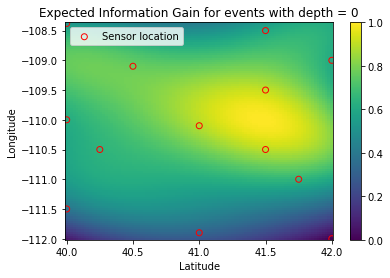

In [153]:
model = GPR()
model.fit(inputs,targets)

preds = model.predict(domain)

plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
               shading='auto', cmap='viridis')

plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
            marker='o',facecolors='none', edgecolors='red', 
            label='Sensor location')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Expected Information Gain for events with depth = {depth_slice}')
plt.colorbar()
plt.legend()
plt.show()

In [102]:
preds = model.predict(domain)

In [88]:
preds = model.predict(inputs)

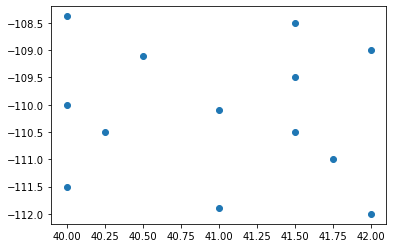

In [123]:
data['sensors'][:,:1]

array([[40.  ],
       [41.  ],
       [42.  ],
       [40.  ],
       [42.  ],
       [41.  ],
       [40.5 ],
       [41.5 ],
       [41.75],
       [40.25],
       [41.5 ],
       [41.5 ],
       [40.  ]])

In [124]:
data['sensors'][:,2]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [148]:
model.kernel

In [75]:
def plot_surface(output_file='outputs.npz', depth_range=[0,40], mag_range=[0,6], stepsize=100, depth_step=1,mag_step=.5, load=True):
    if load:
        data = dict(np.load('outputs.npz'))

    target = data['ig']

    inputs = data['theta_data']
    lat_range = data['lat_range']
    long_range = data['long_range']

    target = target.reshape(len(inputs),-1).mean(axis=1)

    x = np.linspace(lat_range[0], lat_range[1], stepsize)
    y = np.linspace(long_range[0], long_range[1], stepsize)

    xv, yv = np.meshgrid(x, y)
    xy = np.vstack([xv.ravel(), yv.ravel()]).T
        
    domain = np.zeros((stepsize**2, 4))
    domain[:,:2] = xy
    
    model = GPR()
    model.fit(inputs,target)
    
    depth_slices = np.arange(depth_range[0], depth_range[1]+depth_step, depth_step)
    mag_slices = np.arange(mag_range[0], mag_range[1]+mag_step, mag_step)
    
    for depth_slice in depth_slices:
        for mag_slice in mag_slices:
            domain[:,2] = depth_slice
            domain[:,3] = mag_slice

            preds = model.predict(domain)

            plt.pcolormesh(xv, yv, preds.reshape((stepsize, stepsize)),
                           shading='auto', cmap='viridis')
            plt.colorbar()

            plt.scatter(data['sensors'][:,0],data['sensors'][:,1], 
                        marker='o',facecolors='none', edgecolors='red', 
                        label='Sensor location')

            plt.xlabel('Latitude')
            plt.ylabel('Longitude')
            plt.title(f'Expected Information Gain for events with depth = {depth_slice}, mag = {mag_slice}')
            plt.legend()
            plt.tight_layout()
            plt.show()

In [65]:
depth_range = [100.5,114.5]
depth_step = .1
depth_slices = np.arange(depth_range[0], depth_range[1]+depth_step, depth_step)

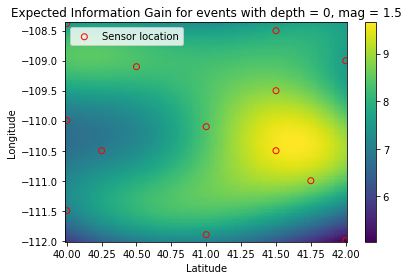

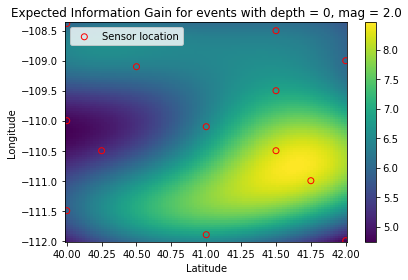

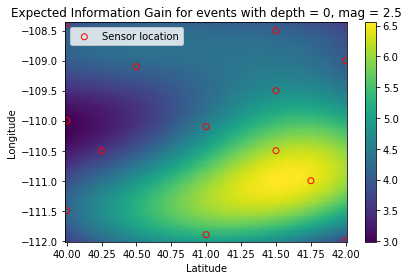

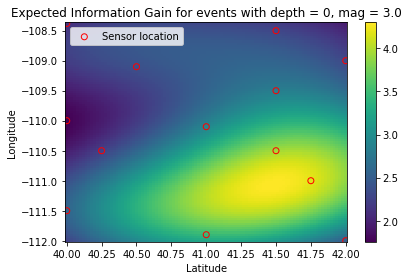

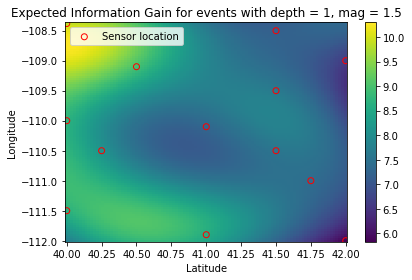

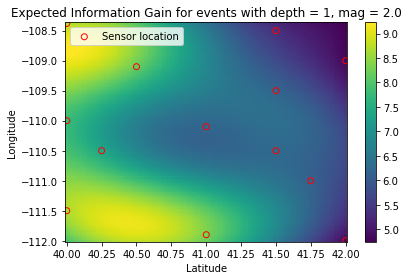

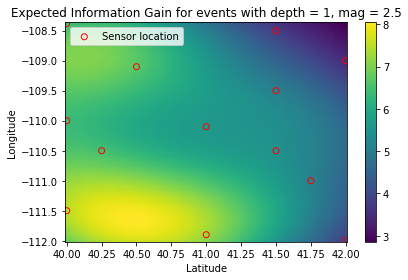

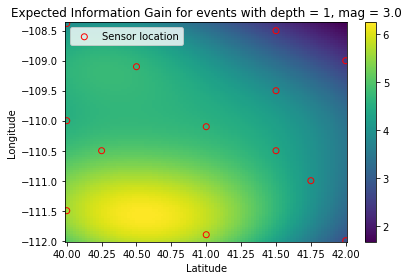

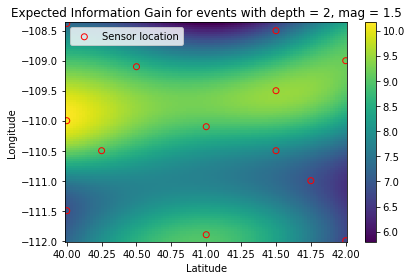

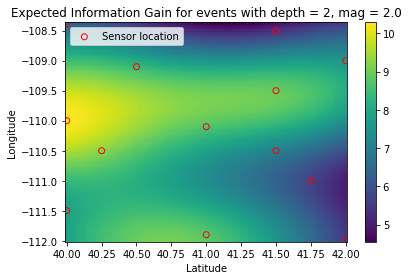

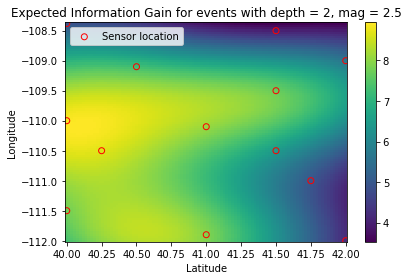

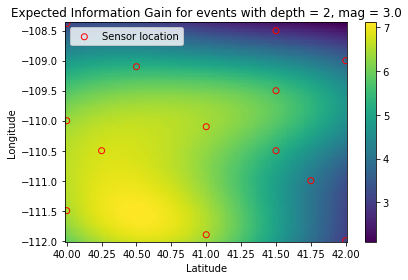

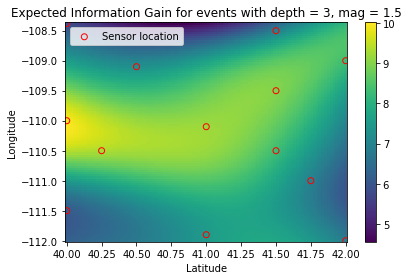

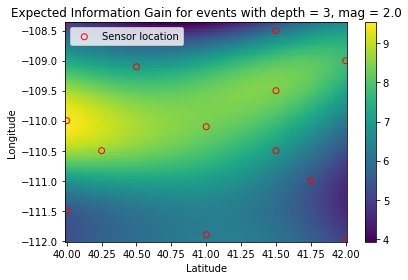

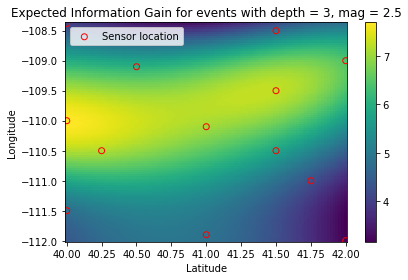

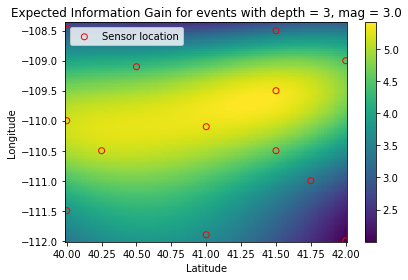

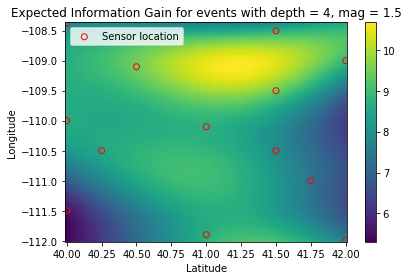

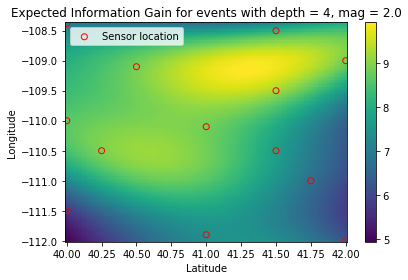

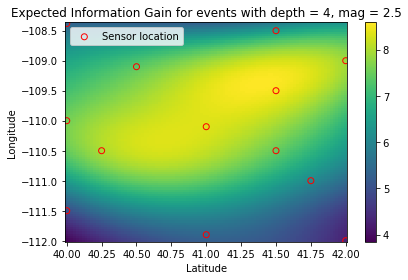

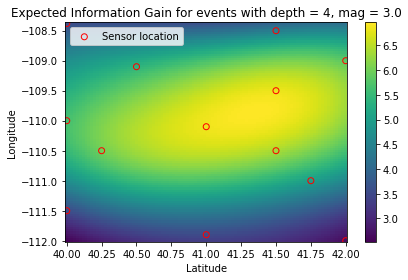

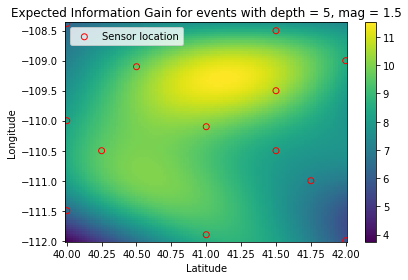

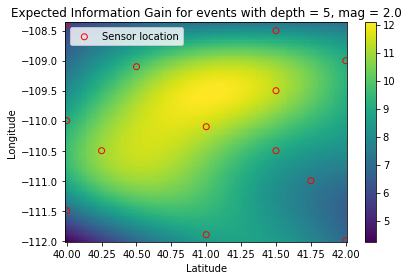

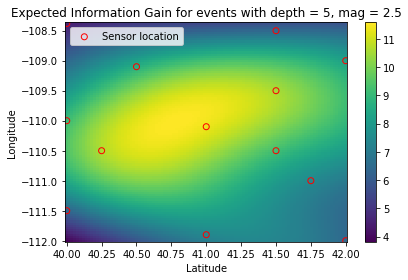

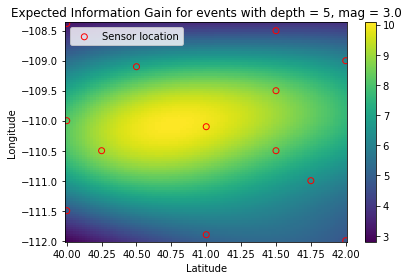

In [78]:
plot_surface(depth_range=[0,5],mag_range=[1.5,3.])

In [42]:
depth_range

[100, 114.5]

In [72]:
inputs[:,-1].min()

0.5004243229276518

In [80]:
df = pd.DataFrame(inputs, columns=['lat', 'long', 'depth', 'mag'])

In [85]:
np.floor(df['depth']).value_counts()

6.0     26
36.0    26
5.0     26
35.0    26
18.0    26
28.0    26
11.0    26
32.0    26
21.0    26
31.0    26
1.0     26
23.0    26
25.0    26
13.0    26
8.0     26
26.0    26
30.0    26
33.0    26
20.0    26
3.0     26
38.0    26
10.0    26
15.0    26
16.0    26
29.0    25
39.0    25
14.0    25
22.0    25
34.0    25
4.0     25
0.0     25
27.0    25
7.0     25
37.0    25
24.0    25
17.0    25
19.0    25
12.0    25
9.0     25
2.0     25
Name: depth, dtype: int64

In [86]:
import os

In [87]:
os.path.join('plots', 'plot1.pdf')

'plots\\plot1.pdf'

In [100]:
from datetime import datetime
curr = datetime.now()

In [122]:
output_path = 'eig_plots'
timestamp = f'{curr.year}-{curr.month}-{curr.day}_{curr.hour}:{curr.minute}:{curr.second}'
filename = f'depth-{np.round(depth_slice,2)}_mag-{np.round(mag_slice,2)}.pdf'

In [123]:
os.path.join(output_path, timestamp, filename)

'eig_plots\\2021-6-11_11:22:39\\depth-1.3_mag-2.4.pdf'

In [121]:
depth_slice = 1.3
mag_slice = 2.4

In [115]:
a = 1.
np.round(a,10)

1.0

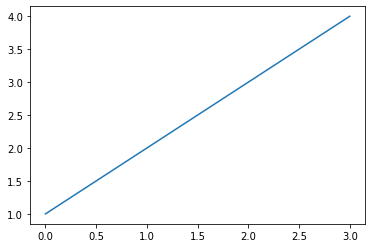

In [124]:
plt.plot([1,2,3,4])

In [125]:
plt.close()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [126]:
df[df['mag']>=3]

,lat,long,depth,mag
470,40.472656,-109.900117,5.703125,3.209270
657,41.716797,-111.360137,22.148438,3.510300
901,41.267578,-110.942988,12.851562,3.033179


In [6]:
samples = data['theta_data']

In [18]:
depth_high = 20
depth_low = 0
mag_high = 3
mag_low = 2

In [19]:
mask = [((samples[:,2]<=depth_high) & (samples[:,2]>=depth_low)) & 
        ((samples[:,3]<=mag_high) & (samples[:,3]>=mag_low))]

In [20]:
samples[tuple(mask)]

array([[  40.5625    , -110.981875  ,    6.25      ,    2.00514998],
       [  40.15625   , -111.1515625 ,   10.625     ,    2.30617997],
       [  41.4609375 , -111.81617187,   17.65625   ,    2.06314193],
       [  41.8046875 , -110.28898437,    4.53125   ,    2.43111871],
       [  41.62109375, -109.03753906,   19.609375  ,    2.73214871],
       [  41.15234375, -109.65972656,    2.734375  ,    2.16787728],
       [  40.75390625, -108.82542969,   11.328125  ,    2.25502745],
       [  41.67773438, -109.87537109,   14.8046875 ,    2.04790196],
       [  41.08398438, -108.80068359,    7.9296875 ,    2.3963566 ],
       [  40.29492188, -109.01279297,    1.2109375 ,    2.11235995],
       [  40.95117188, -109.63498047,   16.8359375 ,    2.55605745],
       [  40.63476562, -111.77728516,    1.7578125 ,    2.66520192],
       [  40.10351562, -110.25009766,   16.1328125 ,    2.14857212],
       [  41.98632812, -111.11267578,    9.7265625 ,    2.23154636]])

In [21]:
np.savez('test_outputs.npz', ig=target, theta_data=inputs, lat_range=lat_range,
         long_range=long_range,sensors=data['sensors'],depth_range=data['depth_range'],
        mag_range=[0,3.5])

In [6]:
data[['eig','seig','ess']]

TypeError: unhashable type: 'list'

In [8]:
row_format ="{:>15}" * (len(vals) + 1)
print(row_format.format("", *vals))

NameError: name 'vals' is not defined

In [13]:
float(data['eig'])

6.447790934361737